In [1]:
from godot.core import tempo
from godot import cosmos

# optionally avoid verbose logging messages
import godot.core.util as util
util.suppressLogger()

from mani import GodotHandler
from mani import VisibilityModel
# specify a time grid
t1 = tempo.Epoch('2026-01-01T00:00:00 TDB')
t2 = tempo.Epoch('2026-04-01T00:00:00 TDB')

import numpy as np

import godot
from mani import UniversePlotter, Plane
import matplotlib.pyplot as plt

godotHandler = GodotHandler(t1, t2, 1.0, './universe2.yml')
godotHandler.initialize_halo_orbit(godotHandler.get_event_grid(), 1000)

import os
os.makedirs('./output/sunlight/', exist_ok=True)

Time (TU),X (LU),Y (LU),Z (LU),VX (LU/TU),VY (LU/TU),VZ (LU/TU)



# Focus on moon an sunlight

In [33]:
def perpendicular_vector(n):
    
    if np.allclose(n, [0, 0, 1]):
        return np.array([1, 0, 0])
    else:
        return np.cross(n, [0, 0, 1])

def vector_to_view_angles(vec, ao, eo):
    vec = vec / np.linalg.norm(vec)
    x, y, z = vec
    azim = np.degrees(np.arctan2(y, x)) + ao
    elev = np.degrees(np.arcsin(z)) + eo
    return elev, azim


def set_view_parallel_to_normal(ax, normal, ao, eo):
    side_vec = perpendicular_vector(normal)
    elev, azim = vector_to_view_angles(side_vec, ao, eo)
    ax.view_init(elev=elev, azim=azim)

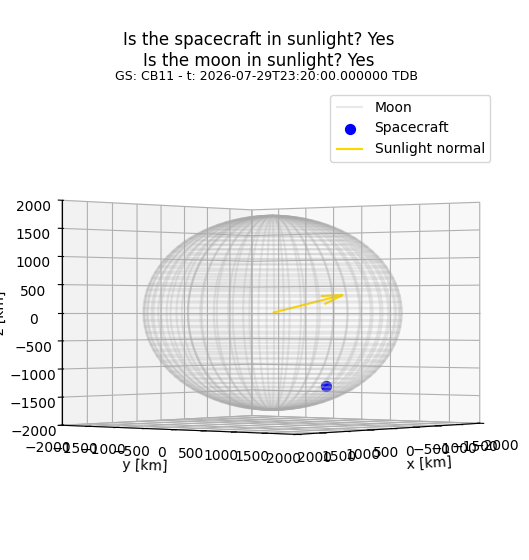

In [35]:
def check_sun_plane(godotHandler, t, filename, azim_offset, elev_offset):
    uni = UniversePlotter(godotHandler, 'CB11', t, 10.0)
    fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'}, figsize=(6,6))
    plt.subplot(1,1,1)

    uni.plot_moon(ax)
    uni.plot_spacecraft(ax)
    uni.plot_sun_plane(ax, 1000)

    ax.set_xlabel("x [km]")
    ax.set_ylabel("y [km]")
    ax.set_zlabel("z [km]")
    
    ax.legend()

    plt.axis('equal')
    uni.set_view_moon_focuced(ax)

    normal = uni.sun
    n = normal / np.linalg.norm(normal)

    set_view_parallel_to_normal(ax, n, azim_offset, elev_offset)

    slos = uni.get_sunlight_on_sc()
    slon = uni.get_sunlight_on_moon()
    s4 = f"Is the spacecraft in sunlight? {'Yes' if slos else 'No'}"
    s5 = f"Is the moon in sunlight? {'Yes' if slon else 'No'}"
    plt.suptitle(f'\n{s4}\n{s5}', y=1.01)
    plt.title(f"GS: {uni.groundstation_name} - t: {uni.timestamp}", fontsize = 9)
    fig.savefig('./output/sunlight/'+filename+'.png', bbox_inches='tight')

t = godot.core.tempo.Epoch('2026-07-29T23:20:00.000000 TDB')
check_sun_plane(godotHandler,t, 'both_in_sunlight', 0.0, 0.0)


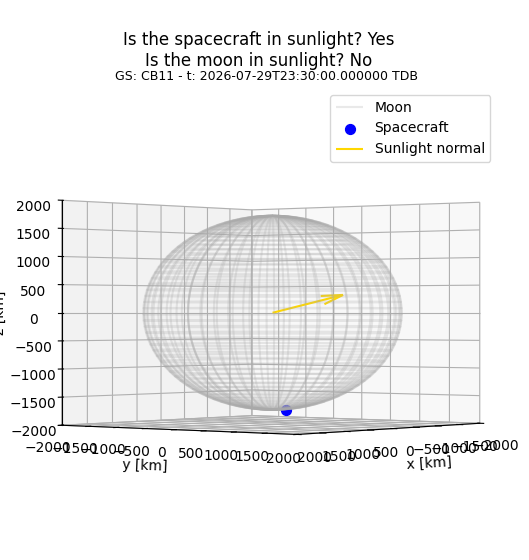

In [29]:
# t = godot.core.tempo.Epoch('2026-04-02T01:00:00 TDB')
t = godot.core.tempo.Epoch('2026-07-29T23:30:00.000000 TDB')
check_sun_plane(godotHandler,t,'spacecraft_in_sunlight', 0.0, 0.0)

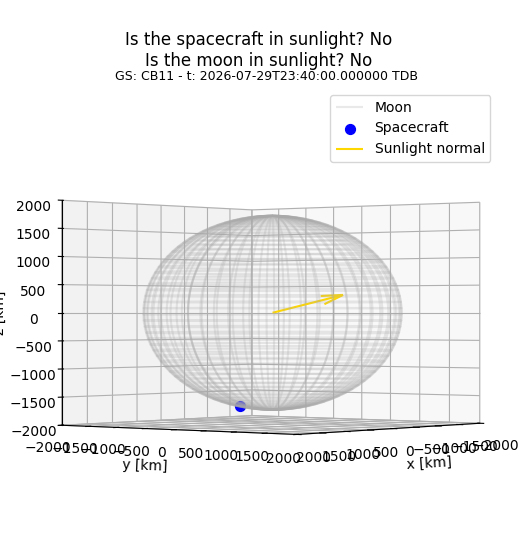

In [26]:
t = godot.core.tempo.Epoch('2026-07-29T23:40:00.000000 TDB')
check_sun_plane(godotHandler,t,'none_in_sunlight', 0.0, 0.0)

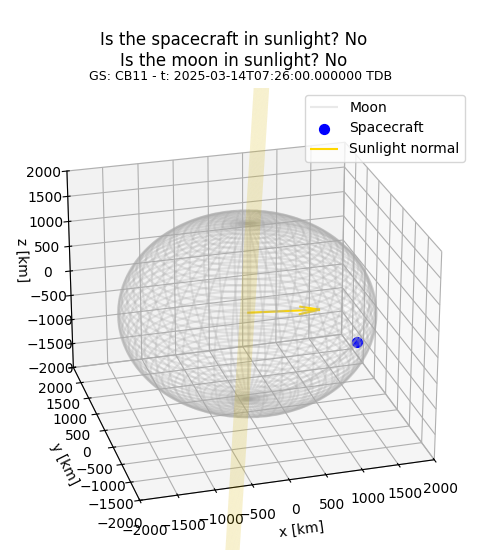

In [6]:
t = godot.core.tempo.Epoch('2025-03-14T07:26:00.000000 TDB')
check_sun_plane(godotHandler,t,'lunar_eclipse', -10.0, 25.0)